In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


2022-03-10 11:30:00.619598: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-10 11:30:00.619626: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Analysis and Visualization

In [2]:
# load the data
spam_data = pd.read_csv("../data/spambase.csv",  sep = ',', header= None )
print(spam_data.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


The colunmn names are integers so renaming the columns appropriately (column names are available at the UCI website here: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [3]:

# renaming the columns
spam_data.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(spam_data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

/home/sajid/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


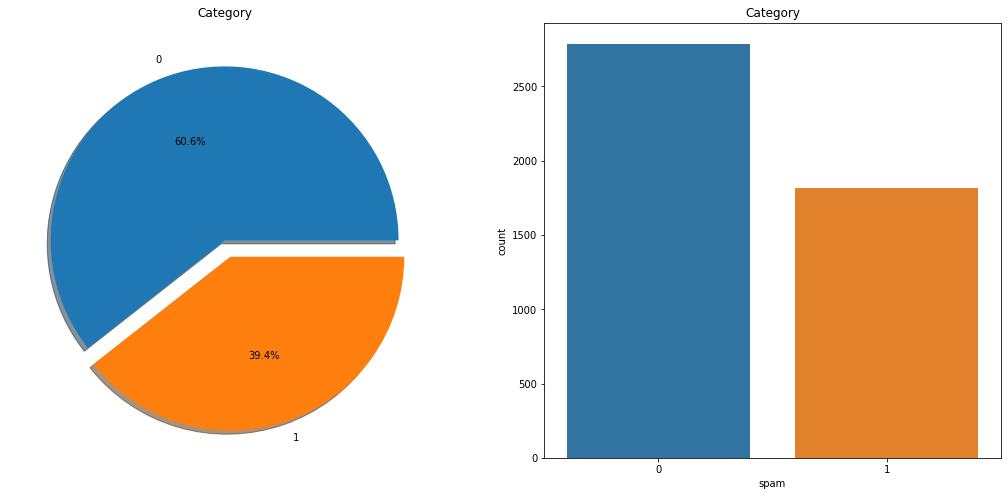

In [4]:
#To show the distribution of spam data
f,ax=plt.subplots(1,2,figsize=(18,8))
spam_data['spam'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Category')
ax[0].set_ylabel('')
sns.countplot('spam',data=spam_data,ax=ax[1])
ax[1].set_title('Category')
plt.show()

/home/sajid/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

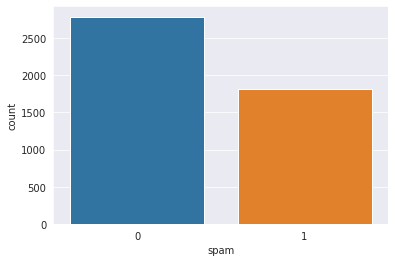

In [5]:
sns.set_style("darkgrid")
sns.countplot(spam_data.spam)


In [6]:
# look at dimensions of the df
print(spam_data.shape)

(4601, 58)


In [7]:
# check missing values in the dataset 
spam_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## Data Preparation
Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables.Rescaling is required as some columns like e.g at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email)

In [8]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
# splitting into X and y in order to seperate labels from features
x= spam_data.drop("spam", axis = 1)
y = spam_data.spam.values.astype(int)

In [10]:
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)

from sklearn.preprocessing import scale
x = scale(x)

In [11]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [12]:
# confirm that splitting also has similar distribution of spam and ham 
# emails
print(y_train.mean())
print(y_test.mean())

0.3978260869565217
0.38522809558291093


# Classification


# Part 1

In [13]:
#Defining the model architecture
#A dropout layer is inserted  as a form of regularization 
#which will help reduce overfitting by randomly setting (here 30%) of the input unit values to zero.
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(x_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

2022-03-10 11:30:03.846901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-10 11:30:03.846951: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-10 11:30:03.846981: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sajid): /proc/driver/nvidia/version does not exist
2022-03-10 11:30:03.847304: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 522       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 622
Trainable params: 622
Non-trainable params: 0
_________________________________________________________________


In [15]:
import visualkeras

In [16]:
from PIL import ImageFont

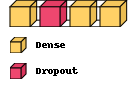

In [17]:
visualkeras.layered_view(model, legend=True)  # font is optional!

In [18]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

In [19]:
history = model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(x_test, y_test),
          verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 1s - loss: 0.9488 - auc: 0.5954WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f125c838950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

4/4 [==============================] - 0s 13ms/step - loss: 0.3544 - auc: 0.9301 - val_loss: 0.3198 - val_auc: 0.9411
Epoch 50/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3502 - auc: 0.9318 - val_loss: 0.3161 - val_auc: 0.9422
Epoch 51/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3391 - auc: 0.9363 - val_loss: 0.3124 - val_auc: 0.9432
Epoch 52/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3400 - auc: 0.9344 - val_loss: 0.3089 - val_auc: 0.9439
Epoch 53/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3358 - auc: 0.9356 - val_loss: 0.3056 - val_auc: 0.9448
Epoch 54/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3346 - auc: 0.9348 - val_loss: 0.3025 - val_auc: 0.9454
Epoch 55/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3281 - auc: 0.9375 - val_loss: 0.2996 - val_auc: 0.9462
Epoch 56/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3227 - auc: 0.9422 - 

4/4 [==============================] - 0s 19ms/step - loss: 0.2337 - auc: 0.9657 - val_loss: 0.2481 - val_auc: 0.9641
Epoch 112/500
4/4 [==============================] - 0s 14ms/step - loss: 0.2413 - auc: 0.9626 - val_loss: 0.2477 - val_auc: 0.9642
Epoch 113/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2359 - auc: 0.9652 - val_loss: 0.2473 - val_auc: 0.9643
Epoch 114/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2394 - auc: 0.9645 - val_loss: 0.2467 - val_auc: 0.9645
Epoch 115/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2364 - auc: 0.9656 - val_loss: 0.2461 - val_auc: 0.9646
Epoch 116/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2345 - auc: 0.9650 - val_loss: 0.2455 - val_auc: 0.9646
Epoch 117/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2343 - auc: 0.9650 - val_loss: 0.2450 - val_auc: 0.9650
Epoch 118/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2315 - auc: 0.

4/4 [==============================] - 0s 14ms/step - loss: 0.2073 - auc: 0.9733 - val_loss: 0.2354 - val_auc: 0.9692
Epoch 174/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2082 - auc: 0.9724 - val_loss: 0.2352 - val_auc: 0.9692
Epoch 175/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2119 - auc: 0.9712 - val_loss: 0.2349 - val_auc: 0.9693
Epoch 176/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2128 - auc: 0.9714 - val_loss: 0.2346 - val_auc: 0.9695
Epoch 177/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2033 - auc: 0.9737 - val_loss: 0.2343 - val_auc: 0.9695
Epoch 178/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2038 - auc: 0.9735 - val_loss: 0.2341 - val_auc: 0.9695
Epoch 179/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1994 - auc: 0.9741 - val_loss: 0.2339 - val_auc: 0.9695
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2043 - auc: 0.

4/4 [==============================] - 0s 14ms/step - loss: 0.1916 - auc: 0.9769 - val_loss: 0.2274 - val_auc: 0.9712
Epoch 236/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1881 - auc: 0.9773 - val_loss: 0.2273 - val_auc: 0.9712
Epoch 237/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1906 - auc: 0.9773 - val_loss: 0.2271 - val_auc: 0.9713
Epoch 238/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1941 - auc: 0.9762 - val_loss: 0.2267 - val_auc: 0.9713
Epoch 239/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1910 - auc: 0.9770 - val_loss: 0.2265 - val_auc: 0.9713
Epoch 240/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1914 - auc: 0.9765 - val_loss: 0.2264 - val_auc: 0.9714
Epoch 241/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1916 - auc: 0.9764 - val_loss: 0.2264 - val_auc: 0.9714
Epoch 242/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1937 - auc: 0.

4/4 [==============================] - 0s 13ms/step - loss: 0.1782 - auc: 0.9799 - val_loss: 0.2215 - val_auc: 0.9730
Epoch 298/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1798 - auc: 0.9791 - val_loss: 0.2213 - val_auc: 0.9730
Epoch 299/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1771 - auc: 0.9799 - val_loss: 0.2213 - val_auc: 0.9730
Epoch 300/500
4/4 [==============================] - 0s 16ms/step - loss: 0.1782 - auc: 0.9797 - val_loss: 0.2214 - val_auc: 0.9731
Epoch 301/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1789 - auc: 0.9796 - val_loss: 0.2215 - val_auc: 0.9729
Epoch 302/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1780 - auc: 0.9799 - val_loss: 0.2215 - val_auc: 0.9730
Epoch 303/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1818 - auc: 0.9793 - val_loss: 0.2218 - val_auc: 0.9729
Epoch 304/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1752 - auc: 0.

4/4 [==============================] - 0s 12ms/step - loss: 0.1708 - auc: 0.9815 - val_loss: 0.2183 - val_auc: 0.9733
Epoch 360/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1708 - auc: 0.9811 - val_loss: 0.2183 - val_auc: 0.9733
Epoch 361/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1688 - auc: 0.9814 - val_loss: 0.2183 - val_auc: 0.9733
Epoch 362/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1712 - auc: 0.9813 - val_loss: 0.2181 - val_auc: 0.9733
Epoch 363/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1733 - auc: 0.9806 - val_loss: 0.2181 - val_auc: 0.9734
Epoch 364/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1663 - auc: 0.9822 - val_loss: 0.2179 - val_auc: 0.9734
Epoch 365/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1755 - auc: 0.9801 - val_loss: 0.2179 - val_auc: 0.9735
Epoch 366/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1706 - auc: 0.

4/4 [==============================] - 0s 13ms/step - loss: 0.1667 - auc: 0.9818 - val_loss: 0.2118 - val_auc: 0.9738
Epoch 422/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1645 - auc: 0.9827 - val_loss: 0.2117 - val_auc: 0.9738
Epoch 423/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1717 - auc: 0.9809 - val_loss: 0.2117 - val_auc: 0.9739
Epoch 424/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1683 - auc: 0.9817 - val_loss: 0.2117 - val_auc: 0.9738
Epoch 425/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1658 - auc: 0.9820 - val_loss: 0.2115 - val_auc: 0.9737
Epoch 426/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1613 - auc: 0.9828 - val_loss: 0.2113 - val_auc: 0.9739
Epoch 427/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1685 - auc: 0.9813 - val_loss: 0.2110 - val_auc: 0.9738
Epoch 428/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1666 - auc: 0.

4/4 [==============================] - 0s 11ms/step - loss: 0.1593 - auc: 0.9834 - val_loss: 0.2058 - val_auc: 0.9748
Epoch 484/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1622 - auc: 0.9830 - val_loss: 0.2061 - val_auc: 0.9748
Epoch 485/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1641 - auc: 0.9823 - val_loss: 0.2062 - val_auc: 0.9747
Epoch 486/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1620 - auc: 0.9826 - val_loss: 0.2061 - val_auc: 0.9747
Epoch 487/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1685 - auc: 0.9808 - val_loss: 0.2059 - val_auc: 0.9747
Epoch 488/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1579 - auc: 0.9831 - val_loss: 0.2056 - val_auc: 0.9747
Epoch 489/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1638 - auc: 0.9820 - val_loss: 0.2050 - val_auc: 0.9747
Epoch 490/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1627 - auc: 0.

# Part 2
Finding the co relation between features and with y label 

In [20]:
# Finding the co relation between each feature and label
# As the features are numerical and label is categorical so kendall is used to measure cor relation 
x = spam_data.drop("spam", axis = 1)
corr_action=x.corrwith(spam_data['spam'],method='kendall').abs()
print(corr_action)

word_freq_make                0.227362
word_freq_address             0.283375
word_freq_all                 0.300356
word_freq_3d                  0.090552
word_freq_our                 0.371915
word_freq_over                0.301855
word_freq_remove              0.496535
word_freq_internet            0.328766
word_freq_order               0.288399
word_freq_mail                0.276449
word_freq_receive             0.341674
word_freq_will                0.130913
word_freq_people              0.203286
word_freq_report              0.146933
word_freq_addresses           0.260423
word_freq_free                0.471148
word_freq_business            0.334895
word_freq_email               0.282620
word_freq_you                 0.305032
word_freq_credit              0.316879
word_freq_your                0.439906
word_freq_font                0.137109
word_freq_000                 0.410411
word_freq_money               0.453766
word_freq_hp                  0.376617
word_freq_hpl            

In [21]:
asc_order=corr_action.sort_values(ascending=False).head(10)

In [22]:
asc_order

char_freq_!                   0.528564
char_freq_$                   0.523779
word_freq_remove              0.496535
word_freq_free                0.471148
word_freq_money               0.453766
word_freq_your                0.439906
capital_run_length_longest    0.425838
word_freq_000                 0.410411
capital_run_length_average    0.399748
word_freq_hp                  0.376617
dtype: float64

In [23]:
relevant_num_features=asc_order

In [24]:
relevant_num_features_col=relevant_num_features.index

In [25]:
selected_num_df = x[relevant_num_features_col]  # Only getting first 10 most correlated features w.r.t output

In [26]:
selected_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   char_freq_!                 4601 non-null   float64
 1   char_freq_$                 4601 non-null   float64
 2   word_freq_remove            4601 non-null   float64
 3   word_freq_free              4601 non-null   float64
 4   word_freq_money             4601 non-null   float64
 5   word_freq_your              4601 non-null   float64
 6   capital_run_length_longest  4601 non-null   int64  
 7   word_freq_000               4601 non-null   float64
 8   capital_run_length_average  4601 non-null   float64
 9   word_freq_hp                4601 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 359.6 KB


# Part3
Removing the significant features and building a fully connected classifier 

In [27]:
rel_cols_list=relevant_num_features_col.tolist()

In [28]:
# ["char_freq_!","char_freq_$","word_freq_remove","word_freq_free","word_freq_money","word_freq_your",
# "capital_run_length_longest","word_freq_000","capital_run_length_average","word_freq_hp"]

In [29]:
x_1 = spam_data.drop(rel_cols_list, axis = 1)
y_1 =spam_data.spam.values.astype(int)

In [30]:
x_1 = scale(x_1)

In [31]:
# split into train and test
x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size = 0.3, random_state = 4)

In [32]:
#Defining the model architecture
#A dropout layer is inserted  as a form of regularization 
#which will help reduce overfitting by randomly setting (here 30%) of the input unit values to zero.
model_1 = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(x_train_1.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [33]:
learning_rate = 0.001

model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC())
             

In [34]:
history = model_1.fit(x_train_1, y_train_1, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(x_test_1, y_test_1),
          verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 1s - loss: 0.8109 - auc_1: 0.4764WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f125f06d5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

Epoch 48/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3341 - auc_1: 0.9442 - val_loss: 0.2848 - val_auc_1: 0.9647
Epoch 49/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3239 - auc_1: 0.9496 - val_loss: 0.2762 - val_auc_1: 0.9666
Epoch 50/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3210 - auc_1: 0.9478 - val_loss: 0.2679 - val_auc_1: 0.9686
Epoch 51/500
4/4 [==============================] - 0s 14ms/step - loss: 0.3064 - auc_1: 0.9538 - val_loss: 0.2598 - val_auc_1: 0.9705
Epoch 52/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3014 - auc_1: 0.9562 - val_loss: 0.2520 - val_auc_1: 0.9724
Epoch 53/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2959 - auc_1: 0.9559 - val_loss: 0.2443 - val_auc_1: 0.9742
Epoch 54/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2810 - auc_1: 0.9614 - val_loss: 0.2368 - val_auc_1: 0.9758
Epoch 55/500
4/4 [==============================] - 0s 1

4/4 [==============================] - 0s 11ms/step - loss: 0.0800 - auc_1: 0.9969 - val_loss: 0.0346 - val_auc_1: 0.9997
Epoch 109/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0789 - auc_1: 0.9969 - val_loss: 0.0333 - val_auc_1: 0.9997
Epoch 110/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0771 - auc_1: 0.9969 - val_loss: 0.0320 - val_auc_1: 0.9997
Epoch 111/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0703 - auc_1: 0.9976 - val_loss: 0.0308 - val_auc_1: 0.9997
Epoch 112/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0700 - auc_1: 0.9977 - val_loss: 0.0297 - val_auc_1: 0.9997
Epoch 113/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0712 - auc_1: 0.9975 - val_loss: 0.0287 - val_auc_1: 0.9997
Epoch 114/500
4/4 [==============================] - 0s 13ms/step - loss: 0.0682 - auc_1: 0.9978 - val_loss: 0.0279 - val_auc_1: 0.9998
Epoch 115/500
4/4 [==============================] - 0s 14ms/s

4/4 [==============================] - 0s 8ms/step - loss: 0.0267 - auc_1: 0.9996 - val_loss: 0.0070 - val_auc_1: 1.0000
Epoch 169/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0263 - auc_1: 0.9997 - val_loss: 0.0068 - val_auc_1: 1.0000
Epoch 170/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0254 - auc_1: 0.9997 - val_loss: 0.0067 - val_auc_1: 1.0000
Epoch 171/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0289 - auc_1: 0.9996 - val_loss: 0.0066 - val_auc_1: 1.0000
Epoch 172/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0282 - auc_1: 0.9997 - val_loss: 0.0064 - val_auc_1: 1.0000
Epoch 173/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0257 - auc_1: 0.9997 - val_loss: 0.0063 - val_auc_1: 1.0000
Epoch 174/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0266 - auc_1: 0.9997 - val_loss: 0.0062 - val_auc_1: 1.0000
Epoch 175/500
4/4 [==============================] - 0s 8ms/step - l

Epoch 229/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0152 - auc_1: 0.9998 - val_loss: 0.0029 - val_auc_1: 1.0000
Epoch 230/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0149 - auc_1: 0.9999 - val_loss: 0.0029 - val_auc_1: 1.0000
Epoch 231/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0145 - auc_1: 0.9999 - val_loss: 0.0028 - val_auc_1: 1.0000
Epoch 232/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0158 - auc_1: 0.9999 - val_loss: 0.0028 - val_auc_1: 1.0000
Epoch 233/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0137 - auc_1: 0.9999 - val_loss: 0.0028 - val_auc_1: 1.0000
Epoch 234/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0154 - auc_1: 0.9999 - val_loss: 0.0028 - val_auc_1: 1.0000
Epoch 235/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0182 - auc_1: 0.9998 - val_loss: 0.0027 - val_auc_1: 1.0000
Epoch 236/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 8ms/step - loss: 0.0117 - auc_1: 0.9999 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 290/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0138 - auc_1: 0.9999 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 291/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0123 - auc_1: 0.9999 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 292/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0145 - auc_1: 0.9998 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 293/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0143 - auc_1: 0.9999 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 294/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0145 - auc_1: 0.9996 - val_loss: 0.0018 - val_auc_1: 1.0000
Epoch 295/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0097 - auc_1: 1.0000 - val_loss: 0.0017 - val_auc_1: 1.0000
Epoch 296/500
4/4 [==============================] - 0s 9ms/step -

4/4 [==============================] - 0s 9ms/step - loss: 0.0095 - auc_1: 1.0000 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 350/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0097 - auc_1: 0.9999 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 351/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - auc_1: 0.9999 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 352/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0087 - auc_1: 1.0000 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 353/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0099 - auc_1: 0.9999 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 354/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0078 - auc_1: 1.0000 - val_loss: 0.0015 - val_auc_1: 1.0000
Epoch 355/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0093 - auc_1: 1.0000 - val_loss: 0.0014 - val_auc_1: 1.0000
Epoch 356/500
4/4 [==============================] - 0s 9ms/step - l

Epoch 410/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0087 - auc_1: 1.0000 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0092 - auc_1: 0.9999 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 412/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0085 - auc_1: 1.0000 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 413/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0065 - auc_1: 1.0000 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 414/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0105 - auc_1: 0.9999 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 415/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0085 - auc_1: 0.9999 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 416/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0078 - auc_1: 1.0000 - val_loss: 0.0012 - val_auc_1: 1.0000
Epoch 417/500
4/4 [==============================] - 

4/4 [==============================] - 0s 10ms/step - loss: 0.0067 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 471/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0077 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 472/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0070 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 473/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0064 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 474/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0061 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 475/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 476/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0068 - auc_1: 1.0000 - val_loss: 0.0011 - val_auc_1: 1.0000
Epoch 477/500
4/4 [==============================] - 0s 9ms/step - l

In [35]:
# load the test data
test_data = pd.read_csv("../test/test.csv",  sep = ',', header= None )
print(test_data.head())

     0     1     2   3     4     5     6     7     8     9   ...  47    48  \
0  0.00  0.64  0.64   0  0.32  0.00  0.00  0.00  0.00  0.00  ...   0  0.00   
1  0.21  0.28  0.50   0  0.14  0.28  0.21  0.07  0.00  0.94  ...   0  0.00   
2  0.06  0.00  0.71   0  1.23  0.19  0.19  0.12  0.64  0.25  ...   0  0.01   
3  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0  0.00   
4  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0  0.00   

      49  50     51     52     53     54   55    56  
0  0.000   0  0.778  0.000  0.000  3.756   61   278  
1  0.132   0  0.372  0.180  0.048  5.114  101  1028  
2  0.143   0  0.276  0.184  0.010  9.821  485  2259  
3  0.137   0  0.137  0.000  0.000  3.537   40   191  
4  0.135   0  0.135  0.000  0.000  3.537   40   191  

[5 rows x 57 columns]


In [36]:
test_data.shape

(8, 57)

In [37]:
#Predict the class of data
pred=model.predict(test_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
print(pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
